# <center> Classification - SKLEARN Framework </center>

## BAC TRAN

### 2022-06-08

## Install neccessary packages

In [ ]:
pip install imbalanced-learn
pip install umap
pip install umap-learn

## Import required libraries

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import svm
from sklearn.svm import SVC

import imblearn
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math
from umap import UMAP

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from sklearn.manifold import TSNE
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline 


## Loading the data

In [2]:
df_cancer = pd.read_csv("breast-cancer.csv")
df_cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Data summary

In [3]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

There are 32 variables with column "id" as id role, "diagnosis" is target variable, the rest are predictors.

## Correlation Visualization

<AxesSubplot:>

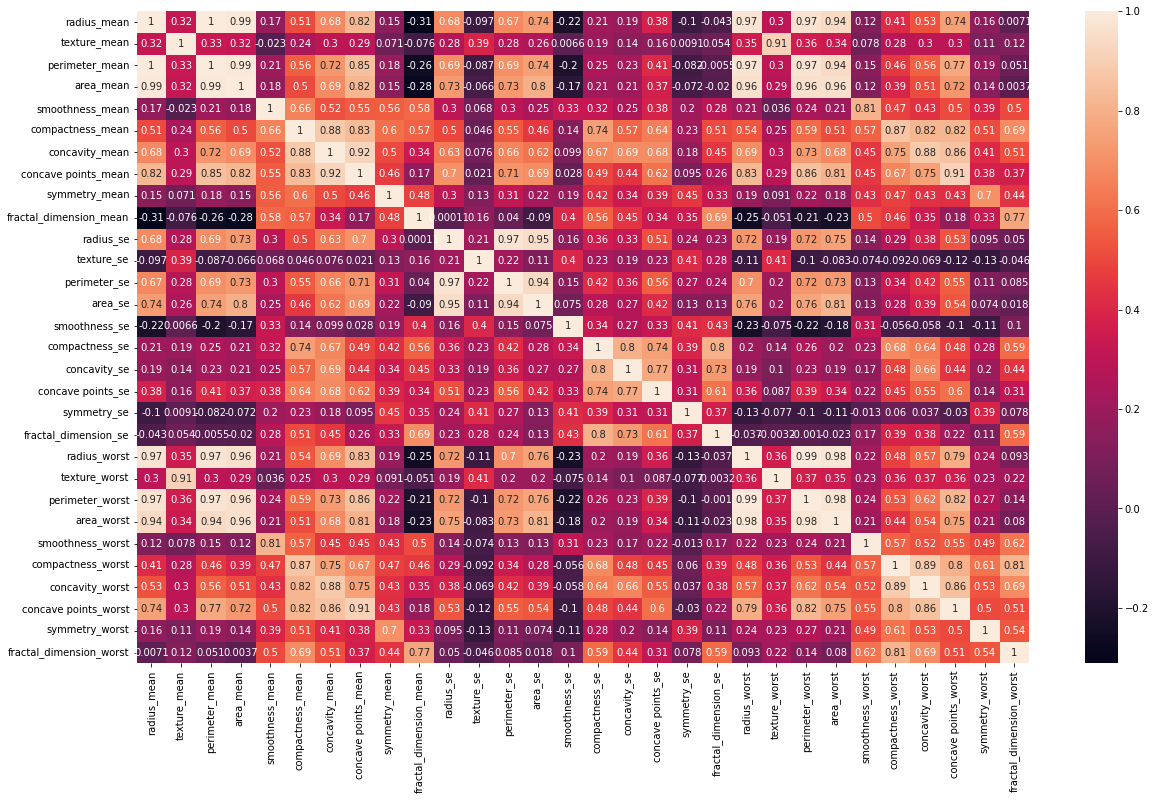

In [4]:
plt.figure(figsize=(20,12))
sns.heatmap(df_cancer.drop(['id','diagnosis'],axis=1, inplace=False).corr(),annot=True) # corr map of numeric variables

We can see there are some very high correlated variables.

## Target variable "diagnosis" class count

In [5]:
df_cancer['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

These classes are imbalanced. We visualise the imbalance by pie chart.

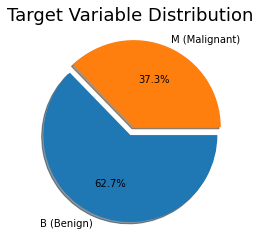

In [6]:
#pie chart to visuallize the imbalance.
#Labels M:"Malignant", B:"Benign"
plt.pie(df_cancer['diagnosis'].value_counts(), labels=['B (Benign)','M (Malignant)'], counterclock=False, shadow=True, 
        explode= [0, 0.1], autopct='%1.1f%%', radius=1, startangle=0)
plt.title('Target Variable Distribution', fontsize=18)
plt.show()

## Label Encoding

Now we drop column id and use lable encoding to tranform target variable to binary.

In [7]:
df = df_cancer.drop(['id'],axis=1, inplace=False) #drop id column
lb = LabelEncoder() 
df['diagnosis'] = lb.fit_transform(df['diagnosis']) #transorm target variable to binary
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Train and Test split

In [8]:
TEST_SIZE_RATIO = 0.3  # split into 2 equally sized train and test sets

# Setup X and y
X = df.drop(['diagnosis'],axis=1) # drop target variable
y = df['diagnosis'] # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE_RATIO, random_state=42)
print("X_train.shape, y_train.shape", X_train.shape, y_train.shape)
print("X_test.shape, y_test.shape", X_test.shape, y_test.shape)

X_train.shape, y_train.shape (398, 30) (398,)
X_test.shape, y_test.shape (171, 30) (171,)


## Model tunning

We use pipeline with steps in order: Borderline SMOTE(upsampling) > Normalize > Umap > SVM model with a radial basis function  
We tune the pipeline using 10 fold cross validation of the train data with gridsearch .

In [36]:
#upsampling by Borderline SMOTE
sm = BorderlineSMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

scaler = StandardScaler() #Standarize 
umap = UMAP(random_state=456) # UMAP dimensional reduction
svm = SVC(random_state = 43, kernel='rbf') # SVM with a radial basis function 

#total 1350 fits
params_grid_pipeline = {"umap__n_components": [5, 10, 15, 25, 28],
                        "umap__n_neighbors": [3, 5, 10], 
                        "svm__C":[0.01, 0.1, 1],
                         "svm__gamma":[0.00001, 0.0001, 0.001]}

pipeline = Pipeline([('sm', sm), ('scaler', scaler), ("umap", umap), ("svm",svm)])

grid_search = GridSearchCV(pipeline, param_grid=params_grid_pipeline, cv=10, verbose=10, scoring = 'roc_auc')
grid_search.fit(X_train, y_train)

Resampled dataset shape Counter({0: 249, 1: 249})
Fitting 10 folds for each of 135 candidates, totalling 1350 fits
[CV 1/10; 1/135] START svm__C=0.01, svm__gamma=1e-05, umap__n_components=5, umap__n_neighbors=3
[CV 1/10; 1/135] END svm__C=0.01, svm__gamma=1e-05, umap__n_components=5, umap__n_neighbors=3;, score=0.861 total time=   2.4s
[CV 2/10; 1/135] START svm__C=0.01, svm__gamma=1e-05, umap__n_components=5, umap__n_neighbors=3
[CV 2/10; 1/135] END svm__C=0.01, svm__gamma=1e-05, umap__n_components=5, umap__n_neighbors=3;, score=1.000 total time=   2.9s
[CV 3/10; 1/135] START svm__C=0.01, svm__gamma=1e-05, umap__n_components=5, umap__n_neighbors=3
[CV 3/10; 1/135] END svm__C=0.01, svm__gamma=1e-05, umap__n_components=5, umap__n_neighbors=3;, score=0.960 total time=   2.5s
[CV 4/10; 1/135] START svm__C=0.01, svm__gamma=1e-05, umap__n_components=5, umap__n_neighbors=3
[CV 4/10; 1/135] END svm__C=0.01, svm__gamma=1e-05, umap__n_components=5, umap__n_neighbors=3;, score=0.955 total time= 

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('sm', BorderlineSMOTE(random_state=42)),
                                       ('scaler', StandardScaler()),
                                       ('umap', UMAP(random_state=456)),
                                       ('svm', SVC(random_state=43))]),
             param_grid={'svm__C': [0.01, 0.1, 1],
                         'svm__gamma': [1e-05, 0.0001, 0.001],
                         'umap__n_components': [5, 10, 15, 25, 28],
                         'umap__n_neighbors': [3, 5, 10]},
             scoring='roc_auc', verbose=10)

## Best scoring and best hyperparameters of grid search

In [37]:
print(f'Best AUROC scoring: {grid_search.best_score_}')
print(f'Best hyperparameters: {grid_search.best_params_}')

Best AUROC scoring: 0.9815206349206349
Best hyperparameters: {'svm__C': 0.1, 'svm__gamma': 0.001, 'umap__n_components': 28, 'umap__n_neighbors': 5}


## Classification Report

In [38]:
y_hat = grid_search.predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       108
           1       0.94      0.95      0.94        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



## Confusion Matrix Visualization

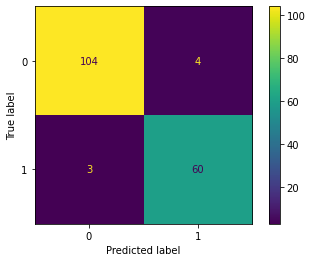

In [39]:
y_hat = grid_search.predict(X_test)
cm = confusion_matrix(y_test, y_hat, labels=grid_search.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=grid_search.classes_)
disp.plot()
plt.show()

End of notebook.